In [1]:
#Reading files

import pandas as pd

links_df = pd.read_csv('links.csv')
movies_df= pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
tags_df = pd.read_csv('tags.csv')

In [2]:
#Basic statistics of Movies file

movies_df.describe()


,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [3]:
#Checking if the Movies file has any null value

movies_df.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [4]:
#Length of Unique genres in Movies file

unique_genre=movies_df['genres'].unique().tolist() #If each combination is a unique genre
len(unique_genre)

951

In [5]:
#define a function that counts the number of times each genre appear:

def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

#here we  make census of the genres:
genre_labels = set()
for s in movies_df['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

#counting how many times each of genres occur:
keyword_occurences, dum = count_word(movies_df, 'genres', genre_labels)


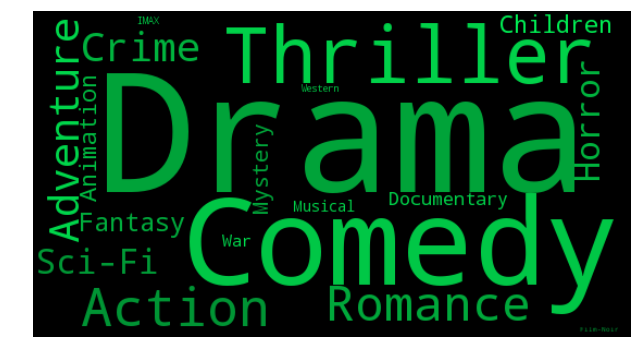

In [6]:
import matplotlib.pyplot as plt # data visualization library
from wordcloud import WordCloud, STOPWORDS #used to generate world cloud


# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


#Finally, the result is shown as a wordcloud:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

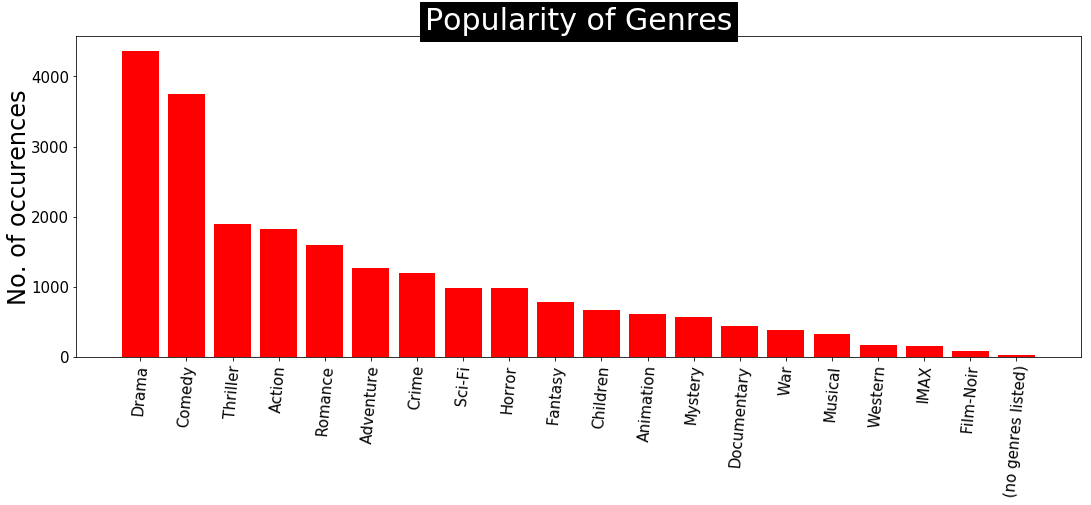

In [7]:
#displaying the same result in the histogram

fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

In [8]:
#Basic statistics of Ratings file

ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [9]:
#Check if there is any null value in Ratings file

ratings_df.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

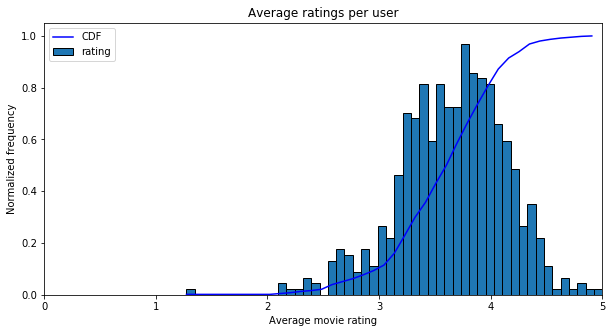

In [10]:
#Average ratings per user

import numpy as np


dftmp = ratings_df[['userId','rating']].groupby('userId').mean()
# Plot histogram
dftmp.plot(kind='hist', bins=50, grid=0, normed=True, edgecolor='black', figsize=(10,5))
# Plot cumulative function on top (couldn't do any other way)
# evaluate the histogram
values, base = np.histogram(dftmp, bins=40, normed=True)
# evaluate the cumulative (multiply by the average distance between points in the x-axis to get UNIT area)
cumulative = np.cumsum(values) * np.diff(base).mean()
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue', label='CDF')
plt.xlim(0,5)
plt.legend()
plt.xlabel ('Average movie rating')
plt.ylabel ('Normalized frequency')
plt.title ('Average ratings per user')
plt.show()




In [11]:
#Basic statistics on Number of times an user has rated movies

ratings_count=ratings_df.groupby('userId').size().reset_index(name='counts')


counts=[]
for i in range(0,len(ratings_count)):
    counts.append(ratings_count['counts'][i])

print("Minimum number of times an user has rated movies:",min(counts))
print("Maximum number of times an user has rated movies:",max(counts))
print("Average number of times an user has rated movies:",np.mean(counts))
print("Average number of times an user has rated movies:",np.median(counts))
print("Standard deviation:", np.std(counts))


Minimum number of times an user has rated movies: 20
Maximum number of times an user has rated movies: 2698
Average number of times an user has rated movies: 165.304918033
Average number of times an user has rated movies: 70.5
Standard deviation: 269.259608061


In [12]:
#Basic statistics of Tags file

tags_df.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [13]:
#check if Tags file has null values

tags_df.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [14]:
#Basic statistics on Number of times an user has tagged movies

tags_count=tags_df.groupby('userId').size().reset_index(name='counts')


counts2=[]
for i in range(0,len(tags_count)):
    counts2.append(tags_count['counts'][i])

print("Minimum number of times an user has tagged movies:",min(counts2))
print("Maximum number of times an user has tagged movies:",max(counts2))
print("Average number of times an user has tagged movies:",np.mean(counts2))
print("Median number of times an user has tagged movies:",np.median(counts2))
print("Standard deviation:",np.std(counts2))

Minimum number of times an user has tagged movies: 1
Maximum number of times an user has tagged movies: 1507
Average number of times an user has tagged movies: 63.5
Median number of times an user has tagged movies: 4.0
Standard deviation: 213.255573562


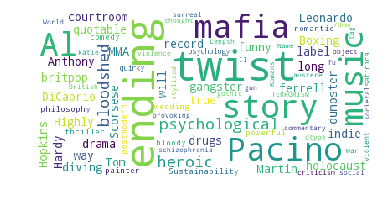

In [15]:
#Word cloud for tagged movies

import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)


# wordcloud = WordCloud(
#                          ).generate(str(tags_df['tag']))

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(tags_df['tag']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()






Action


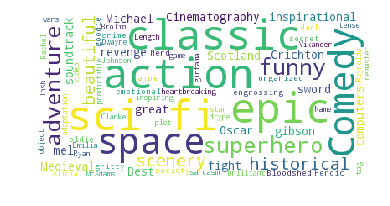

Adventure


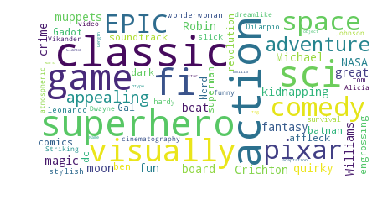

Animation


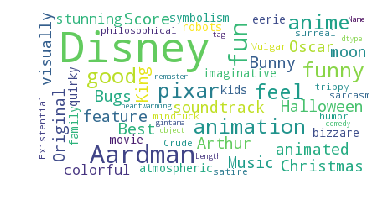

Children


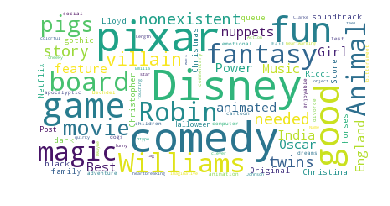

Comedy


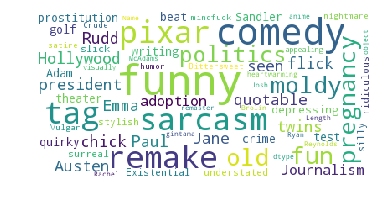

Crime


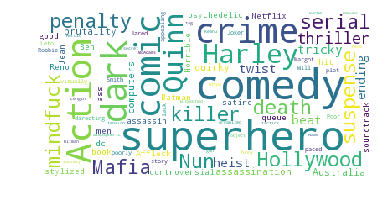

Documentary


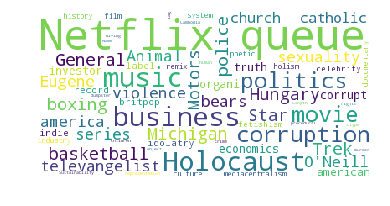

Drama


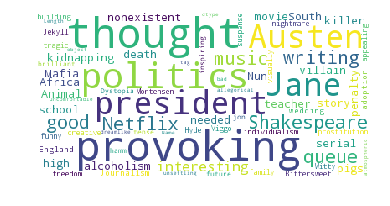

Fantasy


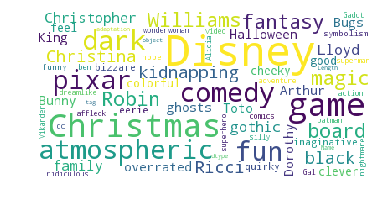

Film-Noir


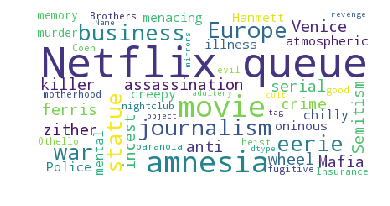

Horror


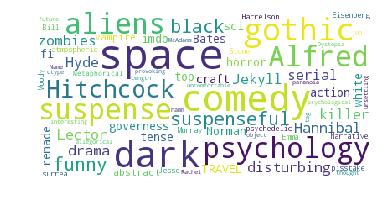

Musical


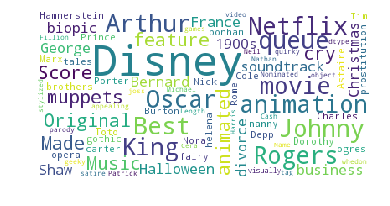

Mystery


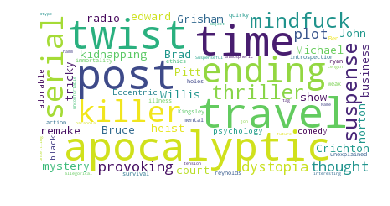

Romance


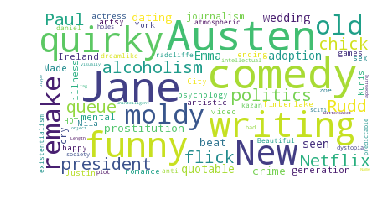

Sci-Fi


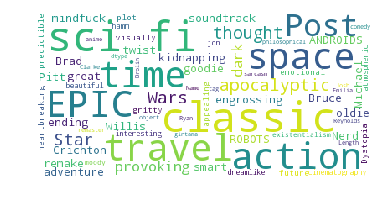

Thriller


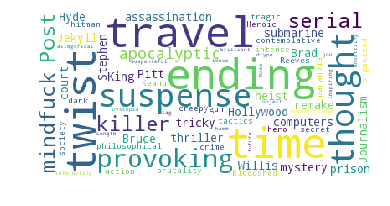

War


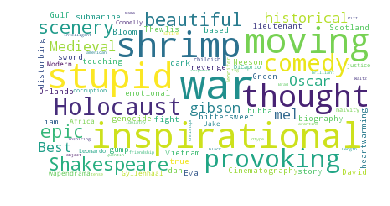

Western


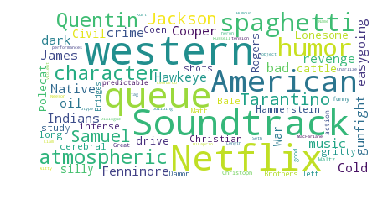

In [16]:
#Word cloud for tags of each genre

movie_tags=movies_df.merge(tags_df,on = 'movieId',how = 'inner')

genres_list=['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']


for i in genres_list:
    print(i)
    drama_movies=movie_tags['genres'].str.contains(i)
    movie_tags[drama_movies].head()
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(movie_tags[drama_movies]['tag']))
    print(wordcloud)
    fig = plt.figure(1)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
